# An endeavor to quantify my physics intuition

- Aka: how well does my confidence and accuracy correlate on physics mcq questions?
- **Running Hypothesis: My intuition sucks.**


## Data

- Chat GPT's image recognition is unfortunately of limited capabilities still as was unable to transcribe by handwritten ratings, so I had to do it manually


In [138]:
for i in range(1, 51):
    print(i, ":")

1 :
2 :
3 :
4 :
5 :
6 :
7 :
8 :
9 :
10 :
11 :
12 :
13 :
14 :
15 :
16 :
17 :
18 :
19 :
20 :
21 :
22 :
23 :
24 :
25 :
26 :
27 :
28 :
29 :
30 :
31 :
32 :
33 :
34 :
35 :
36 :
37 :
38 :
39 :
40 :
41 :
42 :
43 :
44 :
45 :
46 :
47 :
48 :
49 :
50 :


In [139]:
data_1 = {
    1: 2,
    2: 3.5,
    3: 5,
    4: 4.5,
    5: 2,
    6: 3,
    7: 4,
    8: 1,
    9: 4.5,
    10: 5,
    11: 1,
    12: 5,
    13: 4,
    14: 3,
    15: 4,
    16: 3,
    17: 4,
    18: 4,
    19: 4.5,
    20: 1,
    21: 4,
    22: 4,
    23: 1,
    24: 1,
    25: 4,
    26: 3,
    27: 4,
    28: 4.5,
    29: 4.5,
    30: 5,
    31: 5,
    32: 2,
    33: 2,
    34: 3.5,
    35: 3,
    36: 4,
    37: 5,
    38: 1,
    39: 3,
    40: 1,
    41: 5,
    42: 4,
    43: 1,
    44: 3,
    45: 2,
    46: 4,
    47: 1,
    48: 4.5,
    49: 4.5,
    50: 5,
}

inccorect_qs_1 = [50, 48, 43, 40, 39, 38, 36,
                  35, 34, 32, 31, 27, 25, 24, 21, 20, 16, 3]

In [140]:
data_2 = {
    1: 4,
    2: 4,
    3: 2,
    4: 4,
    5: 2,
    6: 2,
    7: 3,
    8: 3,
    9: 3,
    10: 3,
    11: 3,
    12: 4,
    13: 3,
    14: 2.5,
    15: 3.5,
    16: 3,
    17: 5,
    18: 1,
    19: 4,
    20: 2,
    21: 3,
    22: 4,
    23: 2,
    24: 1,
    25: 1,
    26: 3,
    27: 5,
    28: 2,
    29: 4,
    30: 1,
    31: 5,
    32: 2,
    33: 2,
    34: 2,
    35: 3.5,
    36: 4,
    37: 4,
    38: 2,
    39: 3.5,
    40: 3,
    41: 4,
    42: 5,
    43: 5,
    44: 3,
    45: 1,
    46: 4,
    47: 5,
    48: 5,
    49: 2,
    50: 4,
}

inccorect_qs_2 = [42, 30, 29, 28, 25, 24, 21, 5]

## Preparing the Data

- it's easier to code up the correct format for the Qs than manually enter it for a HUNDRED questions


In [141]:
import pandas as pd

# need to perform ops on both before combining bc sequential data may be relevant as well


def convert_to_usable_format(data, inccorect_qs_list):
    # convert format to Q : [rating out of 5, incorrect (0 if correct, 1 if incorrect)]
    for key, value in data.items():
        inccorect = 0
        if key in inccorect_qs_list:
            inccorect = 1
        data[key] = [value, inccorect]


convert_to_usable_format(data_1, inccorect_qs_1)
convert_to_usable_format(data_2, inccorect_qs_2)

df_1 = pd.DataFrame.from_dict(data_1, orient='index', columns=[
                              "confidence", "inccorect"])

df_2 = pd.DataFrame.from_dict(data_2, orient="index", columns=[
                              "confidence", "inccorect"])

data_combined = data_1.copy()
for key, value in data_2.items():
    data_combined[key+50] = value
df_combined = pd.DataFrame.from_dict(data_combined, orient='index', columns=[
    "confidence", "inccorect"])

In [142]:
df_combined.head()

,confidence,inccorect
1,2.0,0
2,3.5,0
3,5.0,1
4,4.5,0
5,2.0,0


## Visualization

- exploring confidence, confidence's correlation with correctness, and time's correlation with correctness


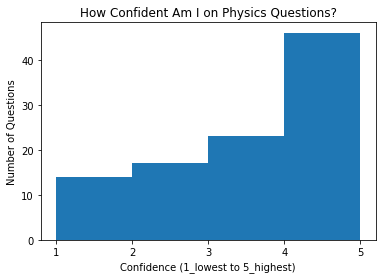

In [143]:
import matplotlib.pyplot as plt

plt.hist(df_combined.confidence, bins=[1, 2, 3, 4, 5])
plt.xticks(range(1, 6))
plt.xlabel("Confidence (1_lowest to 5_highest)")
plt.ylabel("Number of Questions")
plt.title("How Confident Am I on Physics Questions?")
plt.show()

In [144]:
df_confidence_percentage = df_combined.confidence.value_counts() / \
    df_combined.shape[0] * 100

# for the sake of having a neater bar graph
for confidence_index in df_confidence_percentage.index:
    if confidence_index % 1 != 0:
        floored_index = int(confidence_index)
        df_confidence_percentage[floored_index] += df_confidence_percentage[confidence_index]
        df_confidence_percentage.drop(confidence_index, inplace=True)

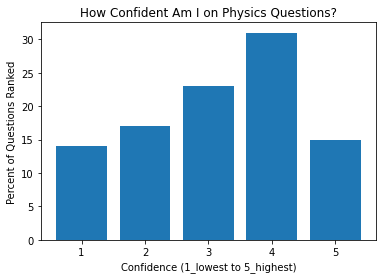

In [145]:
# slightly left-skewed
plt.bar(df_confidence_percentage.index,
        df_confidence_percentage.values)
plt.xlabel("Confidence (1_lowest to 5_highest)")
plt.ylabel("Percent of Questions Ranked")
plt.title("How Confident Am I on Physics Questions?")
plt.show()

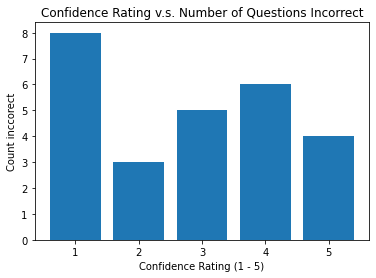

In [146]:
# distribution of count for incorrectness per confidence level
number_incorrect_per_bin = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


def add_inccorect_qs(list_incorrect_qs, data):
    for q in list_incorrect_qs:
        confidence_index = data[q][0]
        number_incorrect_per_bin[int(
            confidence_index)] = number_incorrect_per_bin[int(confidence_index)] + 1


add_inccorect_qs(inccorect_qs_1, data_1)
add_inccorect_qs(inccorect_qs_2, data_2)


plt.bar(number_incorrect_per_bin.keys(), number_incorrect_per_bin.values())
plt.title("Confidence Rating v.s. Number of Questions Incorrect")
plt.ylabel("Count inccorect")
plt.xlabel("Confidence Rating (1 - 5)")
plt.show()

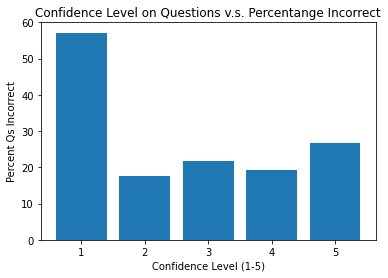

In [147]:
percent_incorrect_per_bin = {}

# going to just convert to ints at this point...
value_counts_dict = {}

for index, value in df_combined.confidence.value_counts().items():
    floored_index = int(index)
    if floored_index in value_counts_dict:
        value_counts_dict[floored_index] += value
    else:
        value_counts_dict[floored_index] = value

value_counts_dict
for key in value_counts_dict.keys():
    percent_incorrect_per_bin[key] = number_incorrect_per_bin[key] / \
        value_counts_dict[key] * 100

percent_incorrect_per_bin

plt.bar(percent_incorrect_per_bin.keys(), percent_incorrect_per_bin.values())
plt.ylabel("Percent Qs Incorrect")
plt.xlabel("Confidence Level (1-5)")
plt.title("Confidence Level on Questions v.s. Percentange Incorrect")
plt.show()

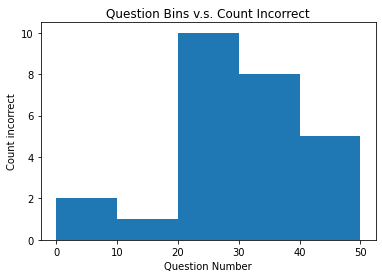

In [148]:
import numpy as np

bins = [0, 10, 20, 30, 40, 50]
all_inccorect = inccorect_qs_1 + inccorect_qs_2
hist, bin_edges = np.histogram(all_inccorect, bins)  # hist = count in each bin

plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge')
plt.ylabel("Count incorrect")
plt.xlabel("Question Number")
plt.title("Question Bins v.s. Count Incorrect")
plt.show()

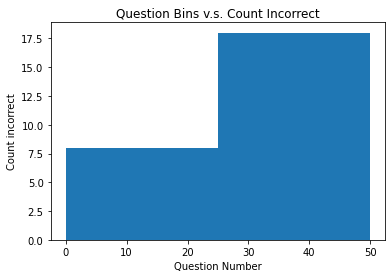

In [149]:
import numpy as np

bins = [0, 25, 50]
all_inccorect = inccorect_qs_1 + inccorect_qs_2
hist, bin_edges = np.histogram(all_inccorect, bins)  # hist = count in each bin

plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge')
plt.ylabel("Count incorrect")
plt.xlabel("Question Number")
plt.title("Question Bins v.s. Count Incorrect")
plt.show()

## Conclusion: Does my intuition, in fact, suck?

#### Conclusion

- Not if I entirely don't know how to a problem (ranking of one). If that's the case, then my odds still hover around 50% -- which is actually pretty good.
- Otherwise, **for the most part, yes**. Regardless of how difficult I rank the question, I have a 20-30% chance of getting it wrong. After the lowest confidence level, the next highest percentage of incorrect per questions lies in the highest confidence level... which is a tad concerning.

#### Side-tangent

- I get a signifant amount more wrong in the second half of the test, most likely reflecting my brain getting tired.
